# Multiple linear regression


In [1]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import plot_reg, plot_res, store_results
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [3]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data (multiple columns)
cols = df.columns
colsX = [col for col in cols if col != "MEDV"]
X = df[colsX].values
y = df["MEDV"]
print(X.shape)
print(y.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

(506, 13)
(506,)


In [4]:
# Standardize data (Not required for simple linear regression, but required for Ridge, Lasso, ElasticNet
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
modelSets = [
    {"model": LinearRegression, "params": {}},
    {"model": Ridge, "params": {"alpha": 1}},
    {"model": Lasso, "params": {"alpha": 1}},
    {"model": ElasticNet, "params": {"alpha": 1, "l1_ratio": 0.5}},
]

,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test,Params
0,LinearRegression,6.947131,22.74548,19.958220,27.195966,0.764545,0.673383,{}
1,Ridge,6.862216,22.74548,19.959850,27.246656,0.764526,0.672774,"{""alpha"": 1}"
2,Lasso,4.684918,22.74548,26.043216,33.310839,0.692758,0.599944,"{""alpha"": 1}"
3,ElasticNet,3.702107,22.74548,27.269635,34.884623,0.678289,0.581044,"{""alpha"": 1, ""l1_ratio"": 0.5}"


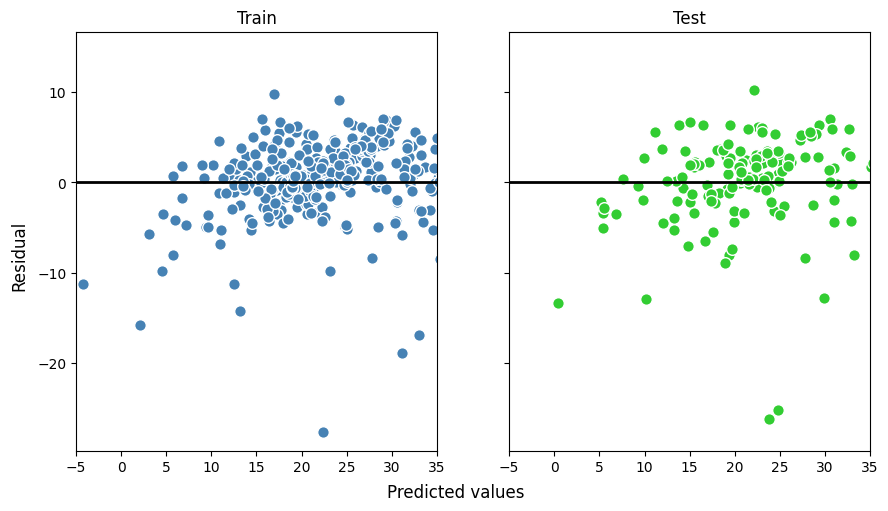

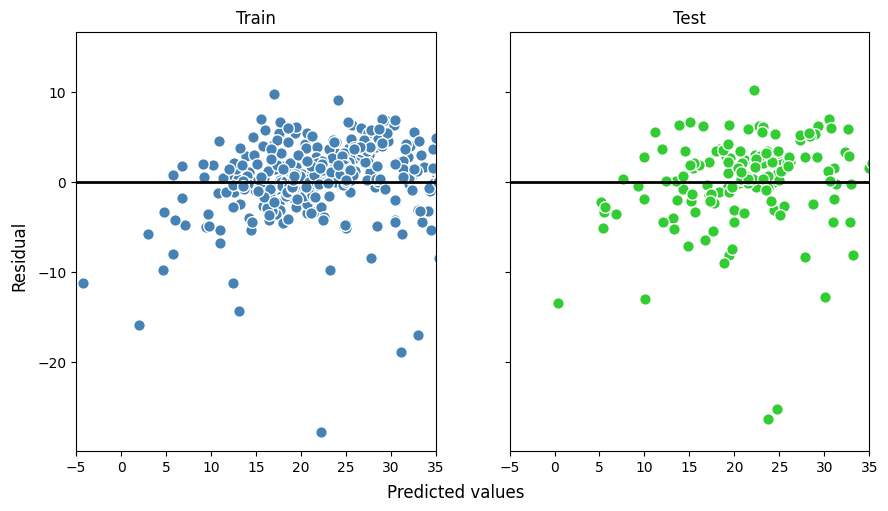

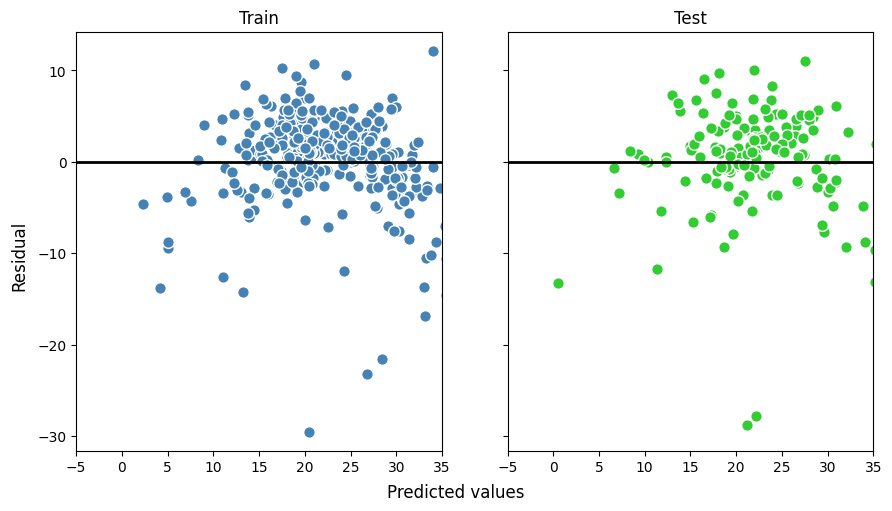

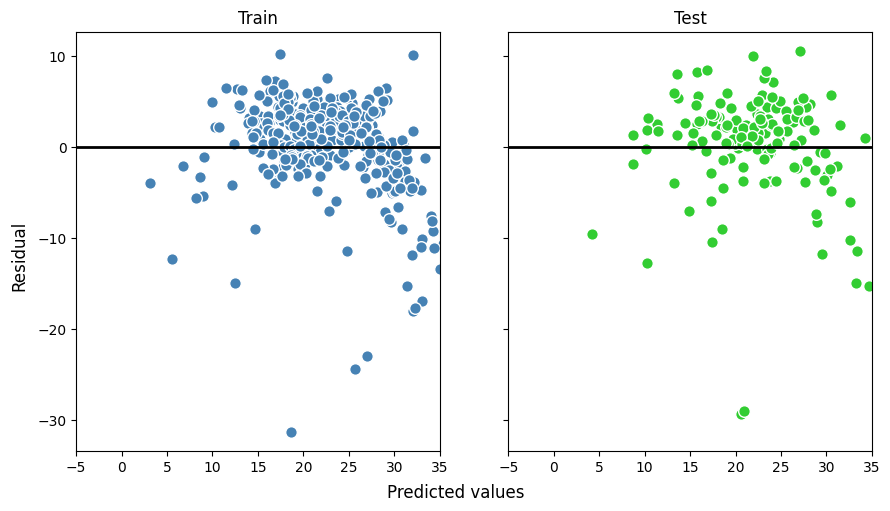

In [6]:
results = []

for m in modelSets:
    # MLR model
    mlr = m["model"](**m["params"])

    # Fitting model
    mlr.fit(X_train_std, y_train)

    # Prediction
    y_train_pred = mlr.predict(X_train_std)
    y_test_pred = mlr.predict(X_test_std)

    # Plotting
    plot_res(y_train, y_test, y_train_pred, y_test_pred)

    store_results(
        results=results,
        model_name=m["model"].__name__,
        model=mlr,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred,
        params=m["params"],
    )

df = pd.DataFrame.from_records(results)
display(df)